<a href="https://colab.research.google.com/github/javadevelopr865/Colab-Notebooks/blob/main/LeightonMeesterVsMinkaKelly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 189 kB 45.1 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 36.9 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 51 kB 242 kB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key=os.environ.get('AZURE_SEARCH_KEY', 'ff9e8c98a1124aa5a1528ffcaef534d1')

In [ ]:
actress = 'leighton_meester','minka_kelly'
path=Path('actress')

if not path.exists():
  path.mkdir()
  for p in actress:
    dest = (path/p)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key," ".join(p.split('_')))
    download_images(dest,urls=results.attrgot('contentUrl'))

In [ ]:
!ls $path/minka_kelly

00000000.jpg  00000050.jpg					00000099.jpg
00000001.jpg  00000051.jpg					00000100.jpg
00000002.jpg  00000052.jpg					00000101.jpg
00000003.jpg  00000053.jpg					00000102.jpg
00000004.jpg  00000054.jpg					00000103.jpg
00000005.jpg  00000055.jpg					00000104.jpg
00000006.jpg  00000056.jpg					00000105.jpg
00000007.jpg  00000057.jpg					00000106.jpg
00000008.jpg  00000058.jpg					00000107.jpg
00000009.jpg  00000059.jpg					00000108.jpg
00000010.jpg  00000060.jpg					00000109.jpg
00000011.jpg  00000061.jpg					00000110.jpg
00000012.jpg  00000062.jpg					00000111.jpg
00000013.jpg  00000063.jpg					00000112.jpg
00000014.jpg  00000064.jpg					00000113.jpg
00000015.jpg  00000065.jpg					00000114.jpg
00000016.jpg  00000066.jpg					00000115.jpg
00000017.jpg  00000067.jpg					00000116.jpg
00000018.jpg  00000068.jpg					00000119.jpg
00000019.jpg  00000069.jpg					00000121.jpg
00000020.jpg  00000070.jpg					00000122.jpg
00000021.jpg  00000071.jpg					00000123.jpg
00000022.jpg  00000072.jpg					0

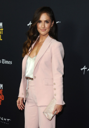

In [ ]:
img=Image.open(path/'minka_kelly'/'00000138.jpg' )
img.to_thumb(128,128)

In [ ]:
fns=get_image_files(path)

In [ ]:
failed=verify_images(fns)
failed

(#0) []

In [ ]:
ac = DataBlock(
    blocks =(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=48),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
ac = ac.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms = aug_transforms())
dls = ac.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


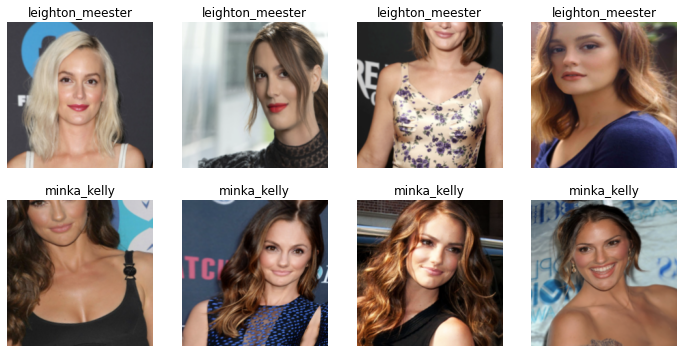

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
learn= cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,1.310665,1.315202,0.534483,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.913309,0.958288,0.551724,00:22
1,0.764123,0.675942,0.724138,00:22
2,0.697085,0.596238,0.741379,00:21
3,0.615853,0.580128,0.724138,00:21


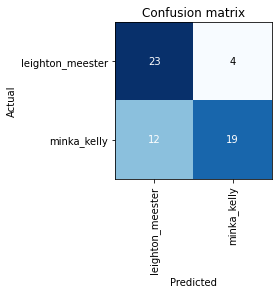

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

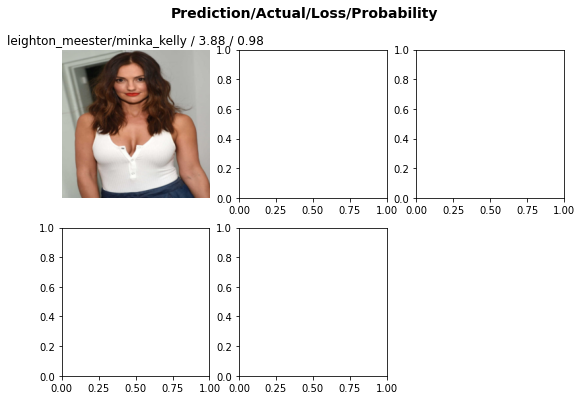

In [ ]:
interp.plot_top_losses(5)